<h1 align="center"> The Sparks Fundation </h1>
<h2 align="center"> Task 2 </h2>
<h2 align="center"> Find Optimum Number Of Clusters </h2>
<h5 align = "right"> by- </h5>
<h5 align = "right"> Shreeman Agrawal </h5>

### Importing the Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import datasets
%matplotlib inline

### Importing the iris dataset

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Testing the dataset for different number of clusters
We test the dataset for clusters from 1 to 11 and save the values of the avg distance of point from their cluster center, aka Inertia.

In [3]:
score = list()
for i in range(1,12):
    cluster = KMeans(n_clusters=i,random_state=10)
    cluster.fit(X)
    score.append([i,cluster.inertia_])

In [4]:
score = np.array(score)
score = pd.DataFrame(score,columns=['Clusters','Inertia'])
print(score)

    Clusters     Inertia
0        1.0  681.370600
1        2.0  152.347952
2        3.0   78.851441
3        4.0   57.228473
4        5.0   46.446182
5        6.0   39.066035
6        7.0   34.298230
7        8.0   30.328666
8        9.0   28.146939
9       10.0   26.315045
10      11.0   24.613279


### Plotting the graph to find the elbow point

Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost.<br>
Elbow point is visible on the graph after which the decrease in Inertai becomes a linear functions

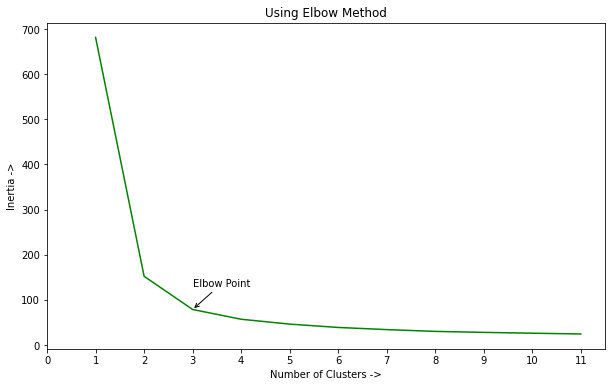

In [5]:
fig = plt.figure(figsize = (10,6))
plt.plot(score.iloc[:,0].values,score.iloc[:,1].values,color = 'green')
plt.xlabel('Number of Clusters ->')
plt.ylabel('Inertia ->')
plt.title('Using Elbow Method')
plt.annotate("Elbow Point", (score.iloc[2,0],score.iloc[2,1]),xytext =(score.iloc[2,0],score.iloc[2,1]+50),
             arrowprops = dict(facecolor ='green',arrowstyle = "->"))
plt.xticks(np.arange(12),np.arange(12))
plt.show()

From the plot we can conclude that the elbow point is reached when number of clusters is equal to 3

### Modelling and visualizing taking 3 as the basis

In [6]:
cluster = KMeans(n_clusters=3,random_state=10)
cluster.fit(X)

KMeans(n_clusters=3, random_state=10)

In [7]:
cc = cluster.cluster_centers_
cc[:,:2]
# these are the chosen centre for clusters

array([[5.006     , 3.428     ],
       [5.9016129 , 2.7483871 ],
       [6.85      , 3.07368421]])

#### Plotting map based on first two and last two coordinates of the the data and chosen cluster to check accuracy as we can't represent all dimensions easily

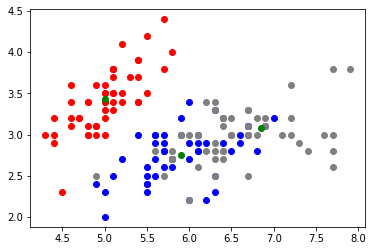

In [8]:
plt.scatter(X[y==0].iloc[:,0].values,X[y==0].iloc[:,1].values,color = 'red')
plt.scatter(X[y==1].iloc[:,0].values,X[y==1].iloc[:,1].values,color = 'blue')
plt.scatter(X[y==2].iloc[:,0].values,X[y==2].iloc[:,1].values,color = 'grey')
plt.scatter(cc[:,0],cc[:,1],color = 'green')
plt.show()

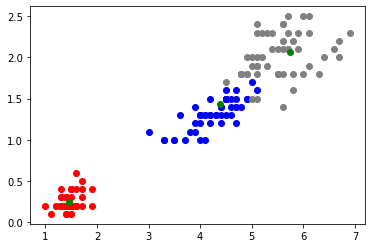

In [9]:
plt.scatter(X[y==0].iloc[:,2].values,X[y==0].iloc[:,3].values,color = 'red')
plt.scatter(X[y==1].iloc[:,2].values,X[y==1].iloc[:,3].values,color = 'blue')
plt.scatter(X[y==2].iloc[:,2].values,X[y==2].iloc[:,3].values,color = 'grey')
plt.scatter(cc[:,2],cc[:,3],color = 'green')
plt.show()

Thus we can conclude that 3 is the best chosen and it is confirmed as there are only three classes in the dataset.

In [10]:
print(cluster.predict(X),"\n",y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


also we can see most labels are correctly identified.

In [12]:
print("Inertia of the model =",cluster.inertia_)

Inertia of the model = 78.851441426146


Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ), both of these conditions are met her as k =3.